In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# парамс
DATASET_PATH = "data"
IMG_SIZE = (64, 64)
NUM_SAMPLES = 400  

In [2]:
def load_images(folder, label, num_samples):
    images = []
    labels = []
    files = os.listdir(folder)[:num_samples]
    for file in tqdm(files, desc=f"Loading {label}"):
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, IMG_SIZE)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
            images.append(img.flatten())
            labels.append(label)
    return images, labels

cats, cat_labels = load_images(os.path.join(DATASET_PATH, "cat"), 0, NUM_SAMPLES)
dogs, dog_labels = load_images(os.path.join(DATASET_PATH, "dog"), 1, NUM_SAMPLES)

Loading 1: 100%|██████████| 400/400 [00:00<00:00, 1154.65it/s]


In [3]:
X = np.array(cats + dogs)
y = np.array(cat_labels + dog_labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# прост классификатор
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_no_pca = accuracy_score(y_test, y_pred)
print("Accuracy without PCA:", accuracy_no_pca)

Accuracy without PCA: 0.51875


In [5]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Training models: 100%|██████████| 10/10 [00:00<00:00, 159.54it/s]


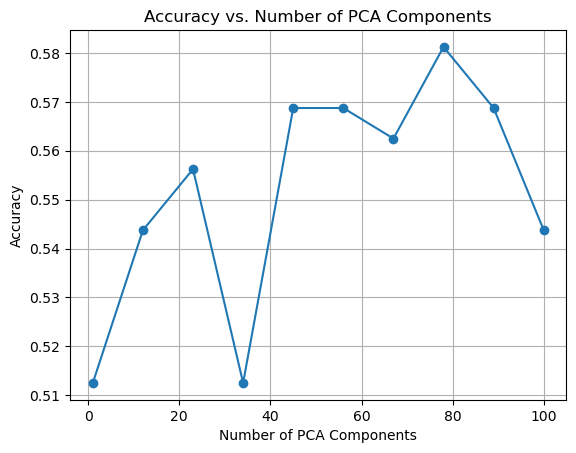

In [ ]:
components = np.linspace(1, 200, 20, dtype=int)  # Берем 20 значений
accuracies = []
for n in tqdm(components, desc="Training models"):
    clf_pca = LinearSVC(dual=False, max_iter=5000)
    clf_pca.fit(X_train_pca[:, :n], y_train)
    y_pred_pca = clf_pca.predict(X_test_pca[:, :n])
    accuracies.append(accuracy_score(y_test, y_pred_pca))

plt.figure()
plt.plot(components, accuracies, marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of PCA Components")
plt.grid()
plt.show()

In [7]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(explained_variance >= 0.9) + 1
print("Number of components for 90% variance:", n_components_90)

Number of components for 90% variance: 144
